# Визуализация графиков обучения нейросетей

## 320х240, свертки 5x5

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
first_stage_losses = None
first_stage_epoch_start_positions = []
model_path = './train_truncated_resnet_with_deconvolution_320x240_5x5'
for epoch in range(1, 31):
    epoch_loss = np.loadtxt(os.path.join(model_path, 'losses_on_epoch{}.txt'.format(epoch)))
    if first_stage_losses is None:
        first_stage_losses = epoch_loss
    else:
        first_stage_losses = np.concatenate((first_stage_losses, epoch_loss))
    first_stage_epoch_start_positions.append(len(first_stage_losses))
first_stage_val_losses = np.loadtxt(os.path.join(model_path, 'val_losses.txt'))

In [3]:
second_stage_losses = None
second_stage_epoch_start_positions = []
model_path = './train_truncated_resnet_with_deconvolution_320x240_5x5_part2'
for epoch in range(1, 11):
    epoch_loss = np.loadtxt(os.path.join(model_path, 'losses_on_epoch{}.txt'.format(epoch)))
    if second_stage_losses is None:
        second_stage_losses = epoch_loss
    else:
        second_stage_losses = np.concatenate((second_stage_losses, epoch_loss))
    second_stage_epoch_start_positions.append(len(second_stage_losses) + \
                                              first_stage_epoch_start_positions[-1])
second_stage_val_losses = np.loadtxt(os.path.join(model_path, 'val_losses.txt'))

In [4]:
third_stage_losses = None
third_stage_epoch_start_positions = []
model_path = './train_truncated_resnet_with_deconvolution_320x240_5x5_part3'
for epoch in range(1, 11):
    epoch_loss = np.loadtxt(os.path.join(model_path, 'losses_on_epoch{}.txt'.format(epoch)))
    if third_stage_losses is None:
        third_stage_losses = epoch_loss
    else:
        third_stage_losses = np.concatenate((third_stage_losses, epoch_loss))
    third_stage_epoch_start_positions.append(len(third_stage_losses) + \
                                             second_stage_epoch_start_positions[-1])
third_stage_val_losses = np.loadtxt(os.path.join(model_path, 'val_losses.txt'))

In [5]:
fourth_stage_losses = None
fourth_stage_epoch_start_positions = []
model_path = './train_truncated_resnet_with_deconvolution_320x240_5x5_part4'
for epoch in range(1, 12):
    epoch_loss = np.loadtxt(os.path.join(model_path, 'losses_on_epoch{}.txt'.format(epoch)))
    if fourth_stage_losses is None:
        fourth_stage_losses = epoch_loss
    else:
        fourth_stage_losses = np.concatenate((fourth_stage_losses, epoch_loss))
    fourth_stage_epoch_start_positions.append(len(fourth_stage_losses) + \
                                              third_stage_epoch_start_positions[-1])
fourth_stage_val_losses = np.loadtxt(os.path.join(model_path, 'val_losses.txt'))

In [6]:
all_train_losses = np.concatenate([first_stage_losses, \
                                   second_stage_losses, \
                                   third_stage_losses, \
                                   fourth_stage_losses])

In [7]:
epoch_start_positions = np.concatenate([first_stage_epoch_start_positions, \
                                       second_stage_epoch_start_positions, \
                                       third_stage_epoch_start_positions, \
                                       fourth_stage_epoch_start_positions])

In [8]:
val_losses = np.concatenate([first_stage_val_losses, \
                             second_stage_val_losses, \
                             third_stage_val_losses, \
                             fourth_stage_val_losses])

In [9]:
def running_mean(X, n):
    cumsum = np.cumsum(X)
    return (cumsum[n:] - cumsum[:-n]) / n

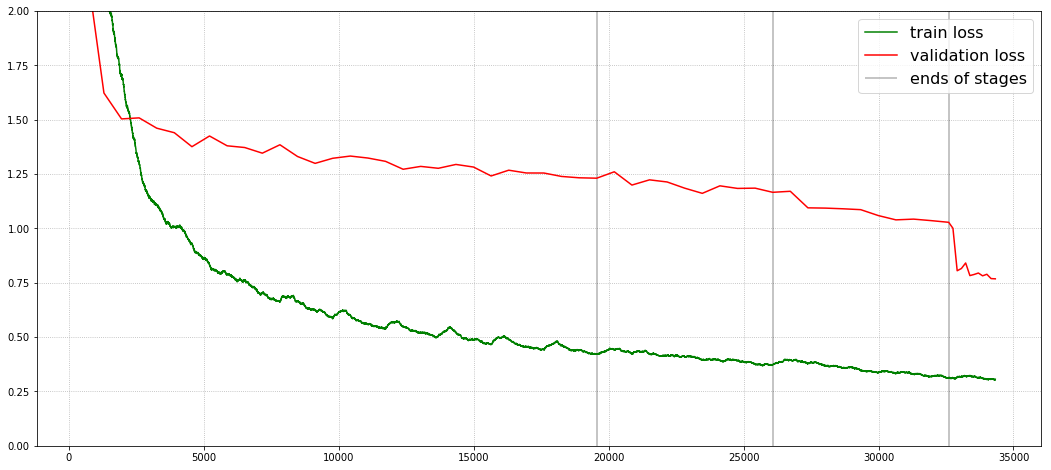

In [15]:
plt.figure(figsize=(18, 8))
n = 500
plt.plot(np.arange(n, len(all_train_losses)), \
         running_mean(all_train_losses, n), \
         color='g', \
         label='train loss'
        )
plt.plot(epoch_start_positions, val_losses, color='r', label='validation loss')
plt.vlines(first_stage_epoch_start_positions[-1], 0, 2, alpha=0.3, label='ends of stages')
plt.vlines(second_stage_epoch_start_positions[-1], 0, 2, alpha=0.3)
plt.vlines(third_stage_epoch_start_positions[-1], 0, 2, alpha=0.3)
plt.ylim((0, 2))
plt.grid(ls=':')
plt.legend(fontsize=16)
plt.savefig('training_curve_320x240_5x5.png')

## 640x480, свертки 5х5

In [29]:
first_stage_losses = None
first_stage_epoch_start_positions = []
model_path = './train_resnet_with_deconvolution'
for epoch in range(1, 21):
    epoch_loss = np.loadtxt(os.path.join(model_path, 'losses_on_epoch{}.txt'.format(epoch)))
    if first_stage_losses is None:
        first_stage_losses = epoch_loss
    else:
        first_stage_losses = np.concatenate((first_stage_losses, epoch_loss))
    first_stage_epoch_start_positions.append(len(first_stage_losses))
first_stage_val_losses = np.loadtxt(os.path.join(model_path, 'val_losses.txt'))

In [30]:
second_stage_losses = None
second_stage_epoch_start_positions = []
model_path = './train_resnet_with_deconvolution_part2'
for epoch in range(1, 21):
    epoch_loss = np.loadtxt(os.path.join(model_path, 'losses_on_epoch{}.txt'.format(epoch)))
    if second_stage_losses is None:
        second_stage_losses = epoch_loss
    else:
        second_stage_losses = np.concatenate((second_stage_losses, epoch_loss))
    second_stage_epoch_start_positions.append(len(second_stage_losses) + \
                                              first_stage_epoch_start_positions[-1])
second_stage_val_losses = np.loadtxt(os.path.join(model_path, 'val_losses.txt'))

In [31]:
third_stage_losses = None
third_stage_epoch_start_positions = []
model_path = './train_resnet_with_deconvolution_part3'
for epoch in range(1, 21):
    epoch_loss = np.loadtxt(os.path.join(model_path, 'losses_on_epoch{}.txt'.format(epoch)))
    if third_stage_losses is None:
        third_stage_losses = epoch_loss
    else:
        third_stage_losses = np.concatenate((third_stage_losses, epoch_loss))
    third_stage_epoch_start_positions.append(len(third_stage_losses) + \
                                             second_stage_epoch_start_positions[-1])
third_stage_val_losses = np.loadtxt(os.path.join(model_path, 'val_losses.txt'))

In [32]:
fourth_stage_losses = None
fourth_stage_epoch_start_positions = []
model_path = './train_resnet_with_deconvolution_part4'
for epoch in range(1, 21):
    epoch_loss = np.loadtxt(os.path.join(model_path, 'losses_on_epoch{}.txt'.format(epoch)))
    if fourth_stage_losses is None:
        fourth_stage_losses = epoch_loss
    else:
        fourth_stage_losses = np.concatenate((fourth_stage_losses, epoch_loss))
    fourth_stage_epoch_start_positions.append(len(fourth_stage_losses) + \
                                              third_stage_epoch_start_positions[-1])
fourth_stage_val_losses = np.loadtxt(os.path.join(model_path, 'val_losses.txt'))

In [33]:
all_train_losses = np.concatenate([first_stage_losses, \
                                   second_stage_losses, \
                                   third_stage_losses, \
                                   fourth_stage_losses])

In [34]:
epoch_start_positions = np.concatenate([first_stage_epoch_start_positions, \
                                       second_stage_epoch_start_positions, \
                                       third_stage_epoch_start_positions, \
                                       fourth_stage_epoch_start_positions])

In [35]:
val_losses = np.concatenate([first_stage_val_losses, \
                             second_stage_val_losses, \
                             third_stage_val_losses, \
                             fourth_stage_val_losses])

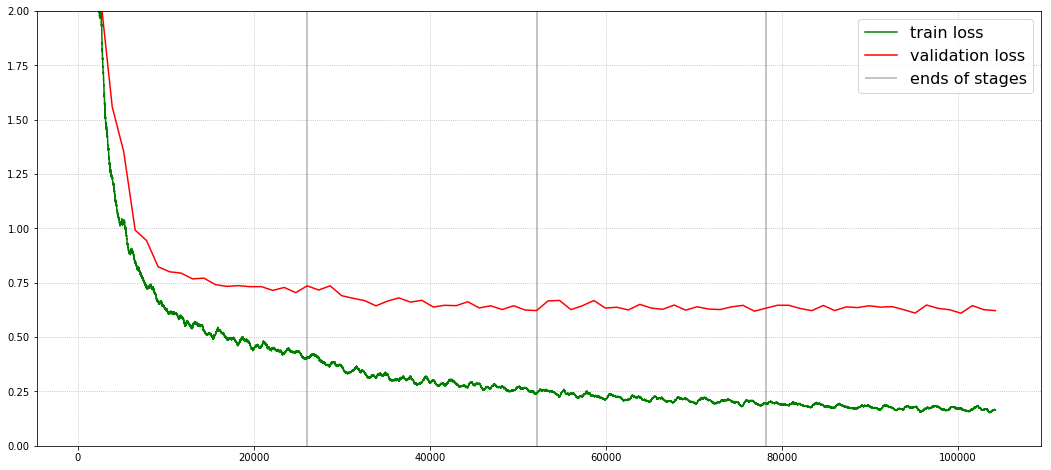

In [37]:
plt.figure(figsize=(18, 8))
n = 500
plt.plot(np.arange(n, len(all_train_losses)), \
         running_mean(all_train_losses, n), \
         color='g', \
         label='train loss'
        )
plt.plot(epoch_start_positions, val_losses, color='r', label='validation loss')
plt.vlines(first_stage_epoch_start_positions[-1], 0, 2, alpha=0.3, label='ends of stages')
plt.vlines(second_stage_epoch_start_positions[-1], 0, 2, alpha=0.3)
plt.vlines(third_stage_epoch_start_positions[-1], 0, 2, alpha=0.3)
plt.ylim((0, 2))
plt.grid(ls=':')
plt.legend(fontsize=16)
plt.savefig('training_curve_320x240_5x5.png')